In [1]:
from PascalX import genescorer

In [2]:
Scorer = genescorer.chi2sum()

**Set reference panel:**

In [4]:
Scorer.load_refpanel("/SSD/home/alessandro/PascalX_dev/misc/pathtostore/EUR.1KGphase3.GRCh38")

**Load genome anotation from ensembl**

In [5]:
from PascalX import genome

D = genome.genome()
D.get_ensembl_annotation("genome_anotation",genetype='protein_coding',version='GRCh38')

done


**Load genome anotation from local file**

In [6]:
Scorer.load_genome("genome_anotation")

19024 active genes


**Load GWAS summary statistics to score:**

In [7]:
summary = "summary_BMI.tsv"
#summary = "summary_Diabetes.tsv"

In [8]:
Scorer.load_GWAS(summary,rscol=0,pcol=6, header= True) #(0 and 6 for BMI) and (1 and 18 for Diabetes)

2405940 SNPs loaded


### Gene scoring:

**Exampe 1:** Score all genes in annotation

In [49]:
R = Scorer.score_all(parallel=20, nobar=True)

18656 genes scored
368 genes can not be scored (check annotation)


**Example 2:** Score genes on chromosomes 21 and 22

In [12]:
R = Scorer.score_chr(chrs=[21,22], parallel=8, nobar=True)

654 genes scored
24 genes can not be scored (check annotation)


**Example 3:** Score genes WDR12 and FARP2

In [66]:
R = Scorer.score(['WDR12','FARP2'], parallel=5, nobar=True)

2 genes scored


**Return:**

In [55]:
#R = [R_SUCCESS,R_FAIL,R_TOTALFAIL]
R[0][1:10]

[['AGRN', 0.894480167753424, 19],
 ['RNF223', 0.9232553629424397, 23],
 ['C1orf159', 0.8689447972888437, 36],
 ['TTLL10', 0.3668527807454057, 35],
 ['TNFRSF18', 0.28701113492566, 26],
 ['TNFRSF4', 0.31357894773709527, 26],
 ['SDF4', 0.33749031202620383, 27],
 ['B3GALT6', 0.3161970063495293, 26],
 ['C1QTNF12', 0.3840503767608814, 20]]

**Re-scoring:**

In [56]:
R = Scorer.rescore(R,method='ruben',mode='128b',reqacc=1e-32,intlimit=100000)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [67]:
#Saving R_sucess to a tsv file
Scorer.save_scores('PascalX_test.tsv')

### Pathway scoring:

**Initialization:**

In [68]:
from PascalX import pathway
#Rank based scoring
Pscorer = pathway.chi2rank(Scorer)
#Monte-Carlo based scoring
#Pscorer = pathway.chi2perm(Scorer)

**Loading modules:**

In [69]:
M = Pscorer.load_modules("PascalX_test.tsv",ncol=0,fcol=2)

18656 modules loaded


In [70]:
RESULT = Pscorer.score(M, parallel=8, nobar=True)

Scoring 0 missing (meta)-genes
0 genes scored


In [71]:
RESULT[0][0]

['ISG15', [], array([], dtype=float64), nan]

### Visualization:

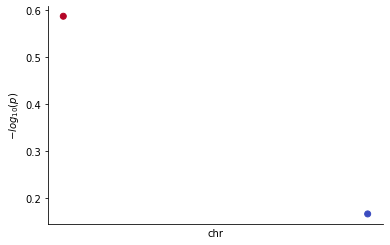

In [72]:
Scorer.plot_Manhattan(R[0])